**This is a project that presents an in-depth SQL analysis of a public dataset from Olist, one of Brazil's top e-commerce platforms. The dataset contains approximately 100,000 real customer orders placed between 2016 and 2018, with multiple tables for customers, orders, products, payments, and sellers. The idea is to treat it like a business case study and use SQL to answer practical questions a company might have.**

**Core Objective: The Business Questions to Answer**
To guide our SQL queries, I have defined the following 6 core business questions for this dataset, covering customer behavior, sales performance, and geographic distribution:
1. **Monthly Order Trend Analysis**: How do order volumes change month over month? Are there clear peak or off-peak sales seasons?
2. **Top-Performing Product Categories**: Which product categories have generated the most revenue?
3. **High-Value Customer Identification**: Who are the top 5 customers by total spending?
4. **Average Order Value (AOV) Calculation**: What is the average amount spent per order?
5. **Customer Geographic Distribution Insights**: In which Brazilian states or cities are most customers located?
6. **Payment Method Preference Analysis**: What are the most popular payment methods (e.g., credit card, boleto, etc.)?

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("ecommerce.db")

items = pd.read_csv("CSV/EC/olist_order_items_dataset.csv")
payments = pd.read_csv("CSV/EC/olist_order_payments_dataset.csv")
reviews = pd.read_csv("CSV/EC/olist_order_reviews_dataset.csv")
orders = pd.read_csv("CSV/EC/olist_orders_dataset.csv")
products = pd.read_csv("CSV/EC/olist_products_dataset.csv")
sellers = pd.read_csv("CSV/EC/olist_sellers_dataset.csv")
customers = pd.read_csv("CSV/EC/olist_customers_dataset.csv")
translation = pd.read_csv("CSV/EC/product_category_name_translation.csv")

items.to_sql("items", conn, if_exists="replace", index=False)
payments.to_sql("payments", conn, if_exists="replace", index=False)
reviews.to_sql("reviews", conn, if_exists="replace", index=False)
orders.to_sql("orders", conn, if_exists="replace", index=False)
products.to_sql("products", conn, if_exists="replace", index=False)
sellers.to_sql("sellers", conn, if_exists="replace", index=False)
customers.to_sql("customers", conn, if_exists="replace", index=False)
translation.to_sql("translation", conn, if_exists="replace", index=False)

71

In [3]:
# Monthly Order Trend Analysis

query1 = """
select strftime('%Y-%m', order_purchase_timestamp) order_month, count(order_id) as total_orders
from orders
where order_purchase_timestamp is not null
group by order_month
order by order_month;
"""
df1 = pd.read_sql_query(query1, conn)
df1

,order_month,total_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [4]:
# Top Performing Product Categories

query2 = """
select translation.product_category_name_english, sum(payments.payment_value) total_revenue
from payments
join items on payments.order_id = items.order_id
join products on items.product_id = products.product_id
join translation on products.product_category_name = translation.product_category_name
group by translation.product_category_name_english
order by total_revenue desc
limit 10;
"""

df2 = pd.read_sql_query(query2, conn)
df2

,product_category_name_english,total_revenue
0,bed_bath_table,1712553.67
1,health_beauty,1657373.12
2,computers_accessories,1585330.45
3,furniture_decor,1430176.39
4,watches_gifts,1429216.68
5,sports_leisure,1392127.56
6,housewares,1094758.13
7,auto,852294.33
8,garden_tools,838280.75
9,cool_stuff,779698.00


In [5]:
# High-Value Customer Identification

query3 = """
select customers.customer_unique_id, sum(payments.payment_value) total_spent
from payments
join orders on payments.order_id = orders.order_id
join customers on orders.customer_id = customers.customer_id
group by customers.customer_unique_id
order by total_spent desc
limit 5;
"""
df3 = pd.read_sql_query(query3, conn)
df3

,customer_unique_id,total_spent
0,0a0a92112bd4c708ca5fde585afaa872,13664.08
1,46450c74a0d8c5ca9395da1daac6c120,9553.02
2,da122df9eeddfedc1dc1f5349a1a690c,7571.63
3,763c8b1c9c68a0229c42c9fc6f662b93,7274.88
4,dc4802a71eae9be1dd28f5d788ceb526,6929.31


In [6]:
# Average Order Value (AOV) Calculation

query4 = """
select avg(order_value) average_order_value
from (
    select order_id, sum(payment_value) order_value
    from payments
    group by order_id )

"""

df4 = pd.read_sql_query(query4, conn)
df4

,average_order_value
0,160.990267


In [7]:
# Customer Geographic Distribution Insights

query5 = """
select customer_state, count(distinct customer_unique_id) number_of_customers
from customers
group by customer_state
order by number_of_customers desc
"""

df5 = pd.read_sql_query(query5, conn)
df5

,customer_state,number_of_customers
0,SP,40302
1,RJ,12384
2,MG,11259
3,RS,5277
4,PR,4882
5,SC,3534
6,BA,3277
7,DF,2075
8,ES,1964
9,GO,1952


In [8]:
# Payment Method Preference Analysis

query6 = """
select payment_type, count(*) total_transaction, sum(payment_value) total_value
from payments
group by payment_type
order by total_transaction desc
"""

df6 = pd.read_sql_query(query6, conn)
df6

,payment_type,total_transaction,total_value
0,credit_card,76795,12542084.19
1,boleto,19784,2869361.27
2,voucher,5775,379436.87
3,debit_card,1529,217989.79
4,not_defined,3,0.00


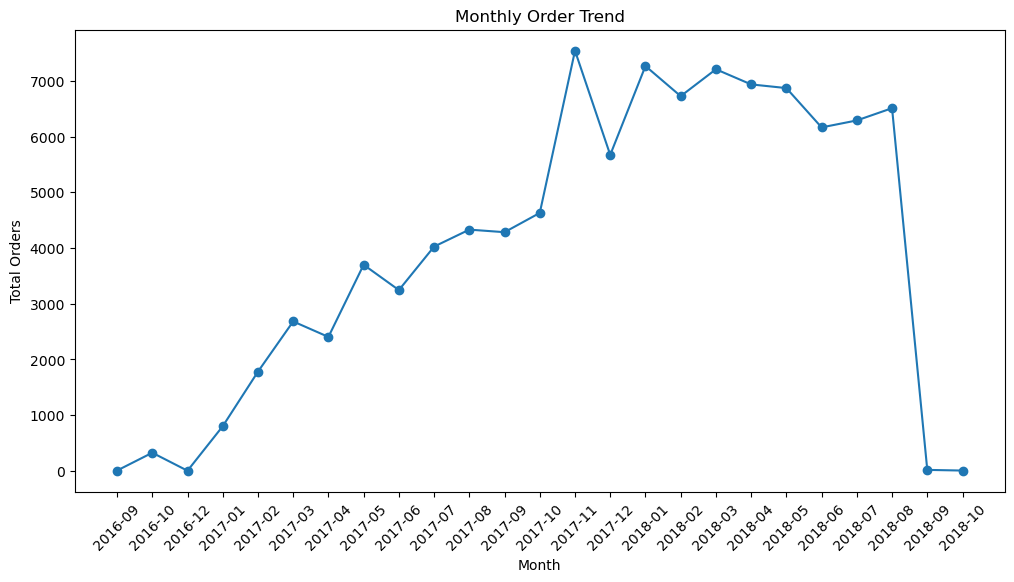

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df1['order_month'], df1['total_orders'], marker='o', linestyle='-')

plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()